Welcome to the Radar technical challenge. 

The goal of this challenge is to assess your technical abilities, as well as your level of autonomy, creativity and technical versatility. 

You are given a dataset of user sessions captured by our MagicLink product, for each user we collect anonymous parameters which we then process to profile each individual user and assign them a segment that is meaningful to increase the conversion of our customers. 

In [1]:
import sys 
import os 
sys.path.append(os.path.abspath('src'))
from src.dataset import Dataset
from src.user_session import UserSession

dataset = Dataset(directory='data')
dataset.load()

To get started we have made available to you basic python classes to read the dataset (Dataset) and the individual user sessions (UserSession). Each user sessions regroups user, device and environment parameters: 

In [2]:
print(dataset.sessions[dataset.session_ids[0]])

USER SESSION f4d6991f-beb7-4153-80a7-b77151ab477d
Time: 1723099632025
Device Type : mobile
Is Touch Capable : True
Browser : Chrome Mobile WebView
Browser Version : 127.0.6533
Os : Android
Os Version : 10
Device : MAR-LX1M
Device Brand : Huawei
Device Model : MAR-LX1M
User Agent String : Mozilla/5.0 (Linux; Android 10; MAR-LX1M Build/HUAWEIMAR-L21MEA; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/127.0.6533.64 Mobile Safari/537.36 musical_ly_2023509040 JsSdk/1.0 NetType/WIFI Channel/googleplay AppName/musical_ly app_version/35.9.4 ByteLocale/fr ByteFullLocale/fr Region/FR AppId/1233 Spark/1.6.0.3-alpha.10 AppVersion/35.9.4 BytedanceWebview/d8a21c6
Language Code : fr
Language : None
Language Locality : None
Dimensions : 360x604
View Area : 217440
Screen Dimensions : 360x771
Screen Area : 277560
View Ratio : 0.7833981841763943
Height : 604
Width : 360
Screen Height : 771
Screen Width : 360
Browser Vendor : Google Inc.
Browser Language : fr, fr-FR, en-US
Ad Blocker : True


You can do whatever you want with this data (data analysis, formatting, visualization, organization, machine learning, dashboards, database, ...). Sky is the limit! You can use the languages and frameworks of your choice. Have fun!

## Data Visualization

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Parse JSON fields and extract relevant data
parsed_sessions = []
for session_id in dataset.session_ids:
    session = dataset.sessions[session_id]
    session_data = {
        'timestamp': pd.to_datetime(session.timestamp),
        'hour': session.hour,
        'weekday': session.day_of_week,
        'device_type': session.device_type,
        'browser': session.browser,
        'country': session.country,
        'city': session.city,
    }
    parsed_sessions.append(session_data)

# Create a DataFrame from parsed sessions
df_sessions = pd.DataFrame(parsed_sessions)

In [41]:
df_sessions

,timestamp,hour,weekday,device_type,browser,country,city
0,1970-01-01 00:28:43.099632025,6 AM,Thursday,mobile,Chrome Mobile WebView,France,Paris
1,1970-01-01 00:28:43.665294942,7 PM,Wednesday,mobile,Chrome Mobile WebView,Italy,Rho
2,1970-01-01 00:28:43.618921952,7 AM,Wednesday,mobile,Instagram,Portugal,Funchal
3,1970-01-01 00:28:43.389705174,3 PM,Sunday,mobile,Instagram,United States,Miami
4,1970-01-01 00:28:42.796259440,6 PM,Sunday,mobile,Chrome Mobile WebView,France,Strasbourg
...,...,...,...,...,...,...,...
5974,1970-01-01 00:28:42.590658122,9 AM,Friday,mobile,Chrome Mobile WebView,France,Montpellier
5975,1970-01-01 00:28:42.841250839,7 AM,Monday,mobile,Chrome Mobile WebView,France,Rodelle
5976,1970-01-01 00:28:43.556153685,1 PM,Tuesday,mobile,Mobile Safari,Ireland,Dublin
5977,1970-01-01 00:28:43.463647503,11 AM,Monday,mobile,Instagram,United States,Tampa


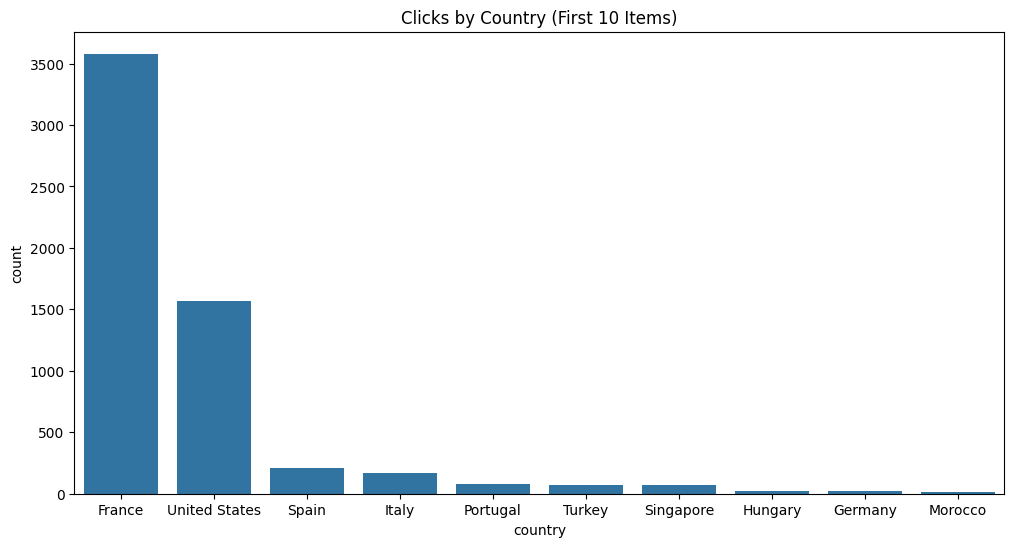

In [42]:

# Visualization: Clicks by country for the first 10 items
plt.figure(figsize=(12, 6))
top_10_countries = df_sessions['country'].value_counts().index[:10]
sns.countplot(data=df_sessions[df_sessions['country'].isin(top_10_countries)],
              x='country',
              order=top_10_countries)
plt.title('Clicks by Country (First 10 Items)')
plt.show()

In [43]:
# Step 5: Define hour order for plotting
hour_order = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
              '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']

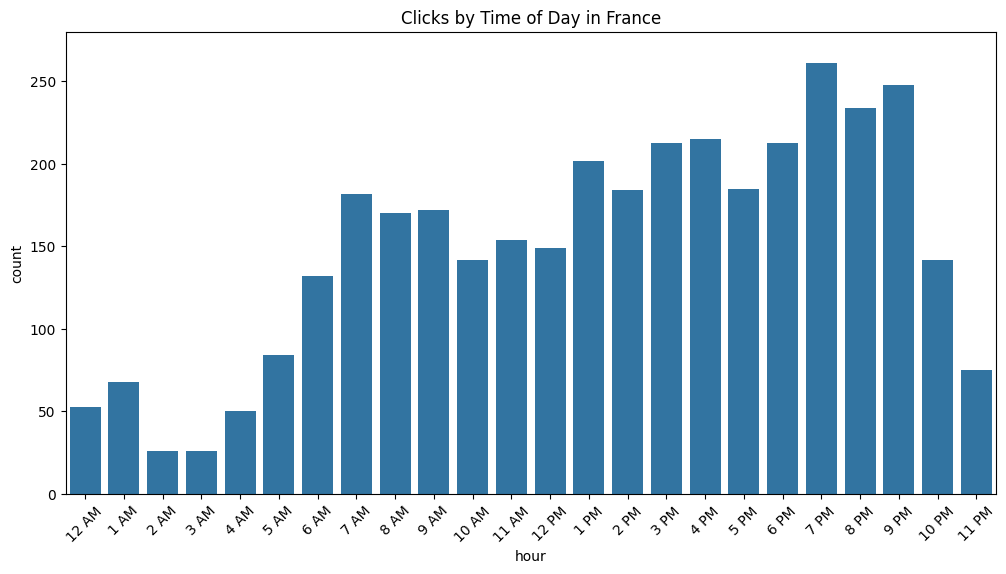

In [44]:
df_france = df_sessions[df_sessions['country'] == 'France']

# Clicks by time of day in France
plt.figure(figsize=(12, 6))
sns.countplot(data=df_france, x='hour', order=hour_order)
plt.title('Clicks by Time of Day in France')
plt.xticks(rotation=45)
plt.ylim(0, 280) 
plt.show()

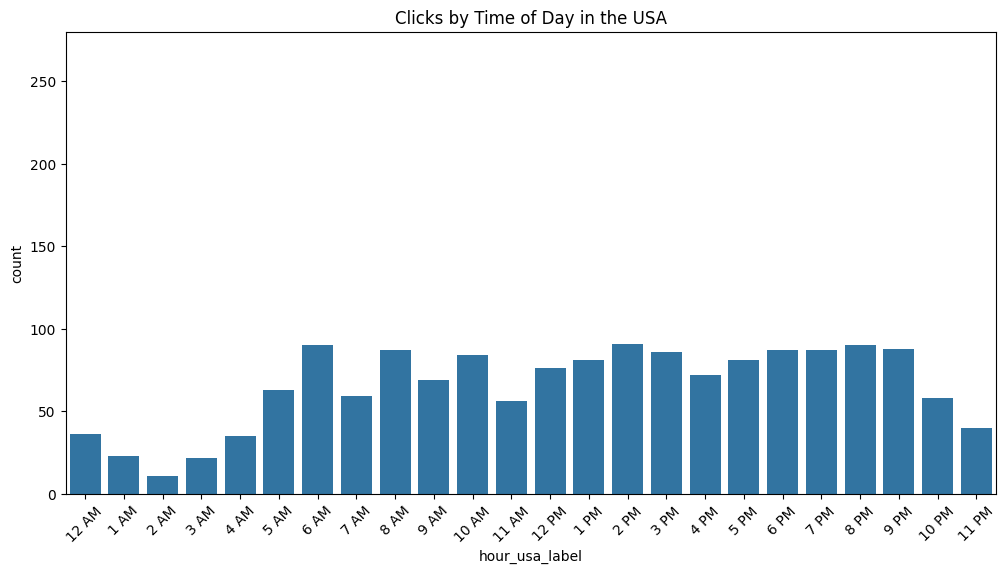

In [45]:
# Helper: convert '6 PM' -> 18
def hour_label_to_24(label):
    return pd.to_datetime(label, format='%I %p').hour

# Helper: convert 18 -> '12 PM'
def hour_24_to_label(hour):
    return pd.to_datetime(str(hour), format='%H').strftime('%-I %p')

# Step 1: Copy USA data (originally in France time)
df_usa = df_sessions[df_sessions['country'] == 'United States'].copy()

# Step 2: Convert to numeric hour
df_usa['hour_24'] = df_usa['hour'].apply(hour_label_to_24)

# Step 3: Shift time zone (France → US Eastern, e.g., -6 hours)
df_usa['hour_usa'] = (df_usa['hour_24'] - 6) % 24

# Step 4: Convert back to 'hour' labels
df_usa['hour_usa_label'] = df_usa['hour_usa'].apply(hour_24_to_label)

# Clicks by time of day in the USA
plt.figure(figsize=(12, 6))
sns.countplot(data=df_usa, x='hour_usa_label', order=hour_order)
plt.title('Clicks by Time of Day in the USA')
plt.xticks(rotation=45)
plt.ylim(0, 280) 
plt.show()


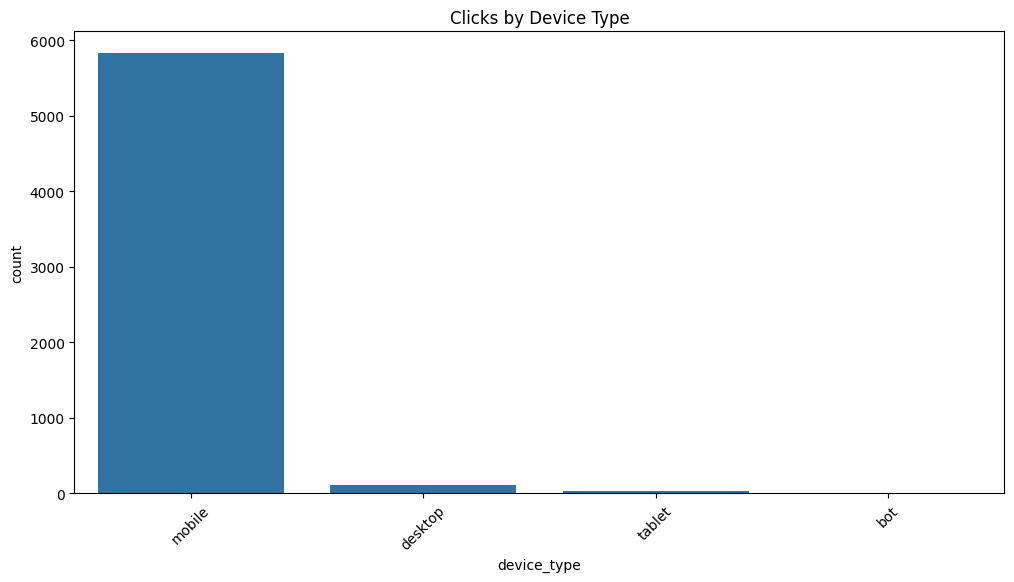

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sessions, x='device_type', order=df_sessions['device_type'].value_counts().index)
plt.title('Clicks by Device Type')
plt.xticks(rotation=45)
plt.show()

## PCA Embedding and Clustering

Perform PCA for dimensionality reduction and plot the first three components in a 3D plot


In [47]:
# Select important columns for one-hot encoding
columns_to_encode = ['hour', 'weekday', 'device_type', 'browser', 'country', 'city']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_sessions[columns_to_encode], drop_first=True)

# Combine the encoded columns with the numerical column 'view_area'
df_sessions_encoded = pd.concat([df_encoded], axis=1)

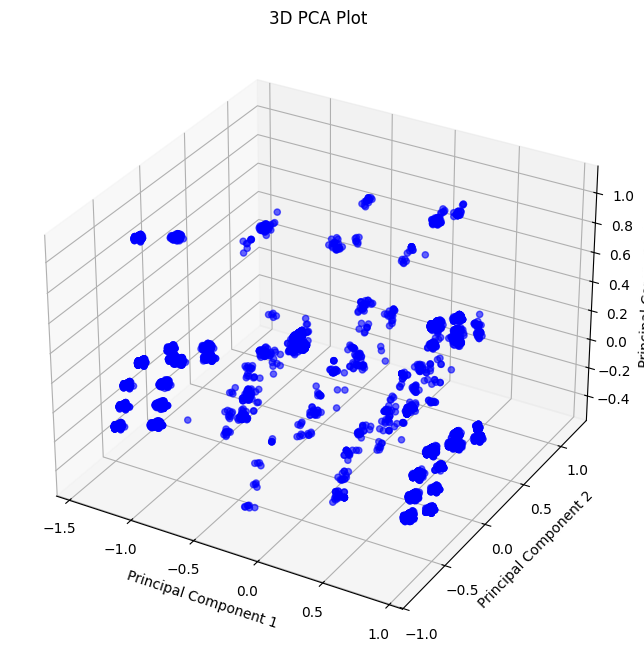

In [50]:
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

# Apply PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(df_sessions_encoded)

# Create a DataFrame for PCA components
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.6, c='blue')

ax.set_title('3D PCA Plot')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

The resulting 3D embedding shows multiple distinct clusters, which likely correspond to different usage contexts characterized by similar temporal, geographic, and technical attributes. These clusters can be interpreted as segments of user behavior based on shared patterns in device usage, access time, and location. 